In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [174]:
df=pd.read_csv(r"../data/cardio_train.csv",  delimiter=';')
df.drop(['id'], axis = 1, inplace=True)

In [175]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
x = df[features]
y = df['cardio']

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit(x_train)

In [179]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [181]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

In [109]:
for estimator in n_estimators:
    rf = XGBClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

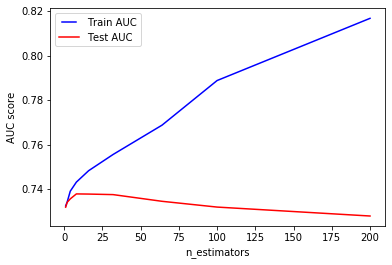

In [110]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [125]:
max_depth = [1, 2, 4, 8, 16]
train_results = []
test_results = []

In [126]:
for depth in max_depth:
    rf = XGBClassifier(max_depth=depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

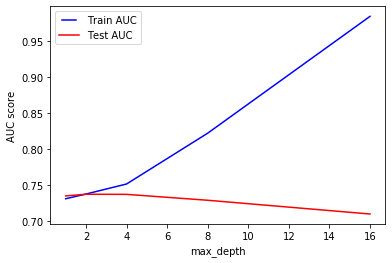

In [127]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

In [139]:
plt.savefig('best_param.png', dpi=150)

<Figure size 432x288 with 0 Axes>

In [180]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42, max_depth=4, n_estimators=10, learning_rate=0.5)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print (accuracy_score(y_pred,y_test))

0.7371904761904762


In [182]:
xgb_model = XGBClassifier(objective="reg:logistic", random_state=42, max_depth=6, n_estimators=10, learning_rate=0.5)
xgb_model.fit(x_train, y_train) 
y_pred = xgb_model.predict(x_test)
print (accuracy_score(y_pred,y_test))

0.7375238095238095


In [183]:
xgb_model = XGBClassifier(objective="count:poisson", random_state=42, max_depth=6, n_estimators=10, learning_rate=0.5)
xgb_model.fit(x_train, y_train) 
y_pred = xgb_model.predict(x_test)
print (accuracy_score(y_pred,y_test))

0.7366666666666667


In [184]:
xgb_model = XGBClassifier(objective="rank:pairwise", random_state=42, max_depth=6, n_estimators=10, learning_rate=0.5)
xgb_model.fit(x_train, y_train) 
y_pred = xgb_model.predict(x_test)
print (accuracy_score(y_pred,y_test))

0.7347142857142858


In [185]:
  # max depth = 6

In [186]:
parameters = {'n_estimators':[5],'max_depth':[6],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.8s finished


0.7335714285714285


{'max_depth': 6,
 'n_estimators': 5,
 'objective': 'rank:pairwise',
 'random_state': 42}

In [188]:
parameters = {'n_estimators':[10],'max_depth':[6],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.8s finished


0.7347142857142858


{'max_depth': 6,
 'n_estimators': 10,
 'objective': 'rank:pairwise',
 'random_state': 42}

In [190]:
parameters = {'n_estimators':[15],'max_depth':[6],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.9s finished


0.7368571428571429


{'max_depth': 6,
 'n_estimators': 15,
 'objective': 'rank:pairwise',
 'random_state': 42}

In [192]:
parameters = {'n_estimators':[20],'max_depth':[6],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s finished


0.7377142857142858


{'max_depth': 6,
 'n_estimators': 20,
 'objective': 'rank:pairwise',
 'random_state': 42}

In [194]:
  # max depth = 4

In [195]:
parameters = {'n_estimators':[5],'max_depth':[4],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.2s finished


0.7330476190476191


{'max_depth': 4,
 'n_estimators': 5,
 'objective': 'binary:logistic',
 'random_state': 42}

In [197]:
parameters = {'n_estimators':[10],'max_depth':[4],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.0s finished


0.7371904761904762


{'max_depth': 4,
 'n_estimators': 10,
 'objective': 'binary:logistic',
 'random_state': 42}

In [199]:
parameters = {'n_estimators':[15],'max_depth':[4],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.2s finished


0.7373333333333333


{'max_depth': 4,
 'n_estimators': 15,
 'objective': 'rank:pairwise',
 'random_state': 42}

In [201]:
parameters = {'n_estimators':[20],'max_depth':[4],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.6s finished


0.7373333333333333


{'max_depth': 4,
 'n_estimators': 20,
 'objective': 'rank:pairwise',
 'random_state': 42}

In [203]:
  # n_estimators 5,10,15,20 and max depth = 2,4,6

In [206]:
parameters = {'n_estimators':[5,10,15,20],'max_depth':[2,4,6],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}

gridsearchmodel = GridSearchCV(xgb_model, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)

y_pred = gridsearchmodel.predict(x_test)
print(accuracy_score(y_pred,y_test))

gridsearchmodel.best_params_



Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   30.2s finished


0.7347142857142858


{'max_depth': 6,
 'n_estimators': 10,
 'objective': 'rank:pairwise',
 'random_state': 42}